## Plotting

In [67]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
from omegaconf import OmegaConf
sys.path.insert(0, "..")
from floral.utils.plotting import (
    OUTPUT_DIR, PLOTS_DIR,
    load_runs,
    histories_to_df,
    setup_experiment_plotting_and_variables,
    plot_and_save,
    variables_metrics_to_csv,
)

HISTORIES = load_runs(output_dir=os.path.join("..", OUTPUT_DIR))

In [68]:
# ========== CHOOSE EXPERIMENT ========== #

# ----- Methods Performances ------ #
# run_methods: Clustered datasets
# EXPERIMENT = "run_methods_synthetic_linear"
# EXPERIMENT = "run_methods_synthetic_mlp"
# EXPERIMENT = "run_methods_mnist_rotate"
# EXPERIMENT = "run_methods_mnist_label_shift"
# EXPERIMENT = "run_methods_cifar10_rotate"
# EXPERIMENT = "run_methods_cifar10_label_shift"
# EXPERIMENT = "run_methods_cifar100"
# EXPERIMENT = "run_methods_mnist_rotate_reduced"
# EXPERIMENT = "run_methods_mnist_label_shift_reduced"
# EXPERIMENT = "run_methods_cifar10_rotate_reduced"
# EXPERIMENT = "run_methods_cifar10_label_shift_reduced"
EXPERIMENT = "run_methods_cifar100_reduced"

# run_methods: General datasets
# EXPERIMENT = "run_methods_emnist"  # XXX
# EXPERIMENT = "run_methods_shakespeare"  # XXX
# EXPERIMENT = "run_methods_stackoverflow"  # XXX


# ----- Ablation Studies ----- #
# ab_convlora: Ablate LoRAs, ConvLoRAs and bias
# EXPERIMENT = "ab_floral_cifar10_rotate"
# EXPERIMENT = "ab_floral_cifar10_label_shift"
# EXPERIMENT = "ab_floral_cifar100"
# EXPERIMENT = "ab_floral_emnist"  # XXX

# ab_normlora: Ablate NorAs separately (informed by results from ab_floral)
# EXPERIMENT = "ab_normlora_cifar100"  # XXX
# EXPERIMENT = "ab_normlora_emnist"  # XXX
# EXPERIMENT = "ab_normlora_stackoverflow"  # XXX

# ab_regularizer: Router regularization
# EXPERIMENT = "hp_regularizer_cifar10_rotate"
# EXPERIMENT = "hp_regularizer_cifar10_label_shift"


# ----- Hyperparameters ----- #
# hp_floral: FLoRAL num clusters and rank
# EXPERIMENT = "hp_floral_cifar10_rotate"
# EXPERIMENT = "hp_floral_cifar10_label_shift"
# EXPERIMENT = "hp_floral_cifar100"
# EXPERIMENT = "hp_floral_emnist"  # XXX
# EXPERIMENT = "hp_floral_shakespeare"  # XXX

# hp_convlora: ConvLoRA methods
# EXPERIMENT = "hp_convlora_cifar10_rotate"
# EXPERIMENT = "hp_convlora_cifar10_label_shift"
# EXPERIMENT = "hp_convlora_cifar100"
# EXPERIMENT = "hp_convlora_emnist"  # XXX

# hp_batchnormlora: Batchnorm methods
# EXPERIMENT = f"hp_batchnormlora_synthetic_mlp_bn"
# EXPERIMENT = f"hp_batchnormlora_cifar100_bn"

In [69]:
filter_values = f"""
experiment: [{EXPERIMENT}]
"""
ignore_values = """
"""
history_df = histories_to_df(
    HISTORIES,
    filter_values=OmegaConf.create(filter_values),
    ignore_values=OmegaConf.create(ignore_values),
    # downsample_len=500,
    hide_na=False,
)
results_dir = os.path.join("..", PLOTS_DIR, f"{EXPERIMENT}")
os.makedirs(results_dir, exist_ok=True)
history_df, plot_opts, variables = setup_experiment_plotting_and_variables(history_df, EXPERIMENT)

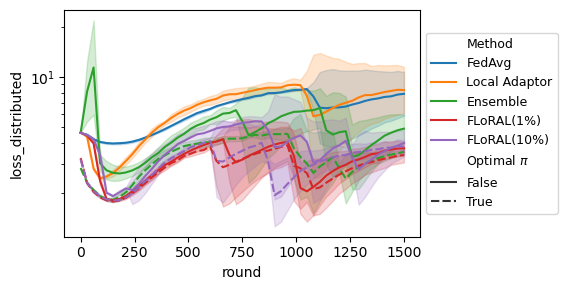

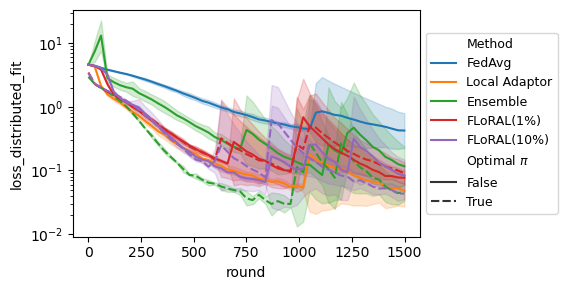

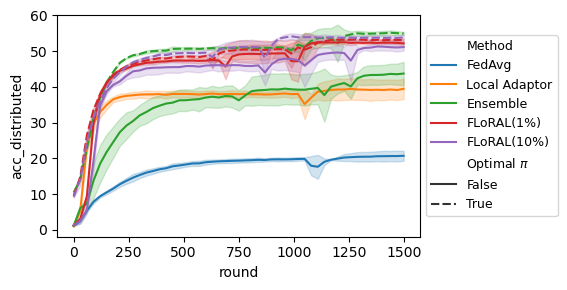

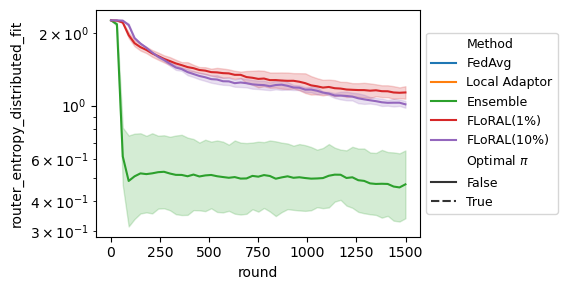

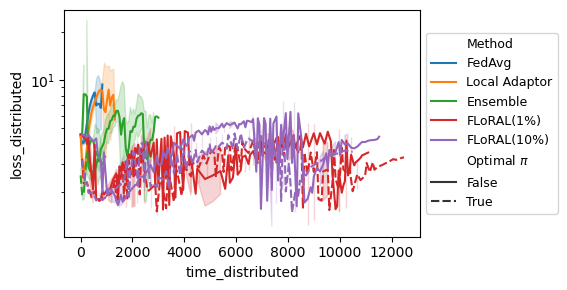

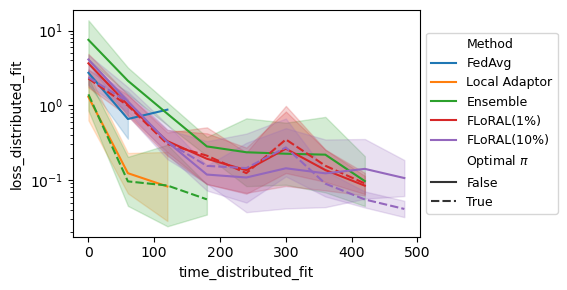

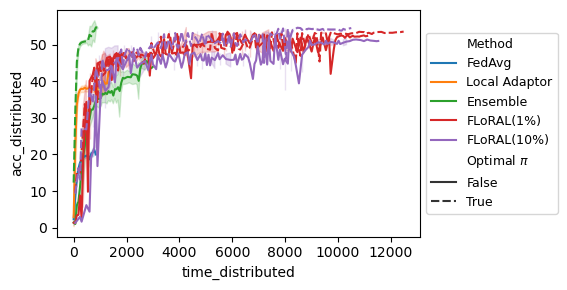

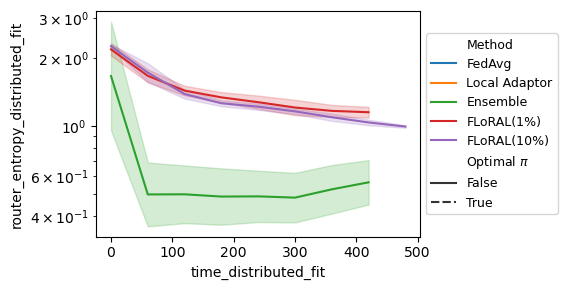

In [70]:
plot_and_save(history_df, plot_opts, results_dir)

In [71]:
df = variables_metrics_to_csv(history_df, variables + ["seed"], results_dir)
df

,Method,Optimal $\pi$,seed,loss_distributed,acc_distributed,total_time
356,Ensemble,False,0,5.828378,43.99275,3420.0
509,Ensemble,False,1,5.023720,40.37900,2520.0
1223,Ensemble,False,2,3.951130,46.86325,3240.0
764,Ensemble,True,0,3.726237,55.46200,1020.0
1172,Ensemble,True,1,3.382451,54.71675,1140.0
458,Ensemble,True,2,3.513197,54.70225,1080.0
203,FLoRAL(1%),False,0,4.111040,51.64850,10860.0
662,FLoRAL(1%),False,1,3.538279,52.39075,11520.0
1019,FLoRAL(1%),False,2,3.533815,52.55225,7740.0
101,FLoRAL(1%),True,0,3.766381,52.94975,10680.0


In [72]:
df = variables_metrics_to_csv(history_df, variables, results_dir)
df_groupedby_seed = df.groupby(variables)
display(df_groupedby_seed.mean())
display(df_groupedby_seed.std())

loss_distributed  acc_distributed  total_time
Method        Optimal $\pi$                                               
Ensemble      False                  4.934409        43.745000      3060.0
              True                   3.540628        54.960333      1080.0
FLoRAL(1%)    False                  3.727711        52.197167     10040.0
              True                   3.386788        53.147333     11760.0
FLoRAL(10%)   False                  4.037161        51.151167     10480.0
              True                   3.818048        53.854083     10000.0
FedAvg        False                  8.124708        20.737250       860.0
Local Adaptor False                  8.595560        39.466417      1340.0

loss_distributed  acc_distributed   total_time
Method        Optimal $\pi$                                                
Ensemble      False                  0.941806         3.249217   476.235236
              True                   0.173527         0.434517    60.000000
FLoRAL(1%)    False                  0.331980         0.481972  2019.009658
              True                   0.347893         0.370727  1111.215551
FLoRAL(10%)   False                  0.697739         0.976045  1643.532780
              True                   0.336714         0.859884  1440.416606
FedAvg        False                  2.216951         1.397235    69.282032
Local Adaptor False                  2.494729         2.845338   124.899960